# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Primero voy a importar pandas para proceder a leer los archivos csv antes mencionados con la función pd.read_csv()
y luego voy a imprimir la información de cada uno para obtener un resumen de cada dataframe y ver susespecificaciones. 


In [3]:
import pandas as pd # importar librerías
import matplotlib.pyplot as plt
import numpy as np

In [6]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';', dtype={'order_id': 'int', 'user_id': 'int'})
products = pd.read_csv('/datasets/products.csv', sep=';', dtype={'product_id': 'int', 'aisle_id': 'int', 'department_id': 'int'})
aisles = pd.read_csv('/datasets/aisles.csv', sep=';', dtype={'aisle_id': 'int'})
departments = pd.read_csv('/datasets/departments.csv', sep=';', dtype={'department_id': 'int'})
order_products = pd.read_csv('/datasets/order_products.csv', sep=';', dtype={'order_id': 'int', 'product_id': 'int'})




In [7]:
print(instacart_orders.info())# mostrar información del DataFrame
print(instacart_orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 

In [8]:
print(products.info())# mostrar información del DataFrame
print(products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             1

In [9]:
print(aisles.info())# mostrar información del DataFrame
print(aisles.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [10]:
print(departments.info())# mostrar información del DataFrame
print(departments.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [11]:
print(order_products.info())# mostrar información del DataFrame
print(order_products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Al leer las espicificaciones y mostrar un ejemplo de la información contenida en los dataframes, pude observar que hay algunos errores en los archivos que pueden dificultar nuestro anáisis, por ejemplo las columnas y demás datos estan separadas por punto y coma en lugar de coma además de que hay algunos datos que están en formato de texto que hay que cambiar de tipo para poder trabajar en la información adecuadamente. 



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?


Listo profesor! la explicación de lo que hice para procesar los datos la puse aquí abajo en el plan de solución del paso 2, gracias!


## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

En este paso hice algunos cambios a la hora de leer los archivos para que la información se desplegara de mucho mejor manera y así evitar problemas a la hora de realizar los ejercicios, indiqué el separador punto y coma por coma para que los datos y columnas se pudiesen leer separados ya que anteriormente se leía todo junto e indicaba que solo había una columna, además cambié el tipo de datos de algunas columnas en cada dataframe de texto a int.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [13]:
# Revisa si hay pedidos duplicados
duplicated_orders = instacart_orders.duplicated(subset=['order_id'], keep=False)
print(duplicated_orders.sum())

duplicated_orders = instacart_orders[instacart_orders.duplicated(subset=['order_id'], keep=False)]
print(duplicated_orders)

30
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Sí hay líneas dupicadas y tienen en común que todas fueron realizadas el miércoles a las 2 de la mañana

In [14]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_2am_orders = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
print(wednesday_2am_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Sugiere que hay un problema con los datos ya que hay pedidos duplicados.

In [15]:
# Elimina los pedidos duplicados
instacart_orders.drop_duplicates(subset=['order_id'], keep='first', inplace=True)


In [16]:
# Vuelve a verificar si hay filas duplicadas
duplicated_orders = instacart_orders.duplicated(subset=['order_id'], keep=False)
print(duplicated_orders.sum())

0


In [17]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicated_order_ids = instacart_orders.duplicated(subset=['order_id'], keep=False)
print(duplicated_order_ids.sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

En este ejercicio encontramos que habìa un problema con los datos ya que había 30 pedidos duplicados y todos coincidían en que 
fueron realizados el día miércoles a las dos de la mañana, entonces se procedió a eliminar todos los pedidos duplicados.

### `products` data frame

In [18]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [19]:
# Verifica únicamente si hay IDs duplicadas de productos
print(products.duplicated(subset=['product_id']).sum())

0


In [20]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(products['product_name'].str.upper().duplicated().sum())

1361


In [21]:
# Revisa si hay nombres duplicados de productos no faltantes
non_missing_product_names = products['product_name'].dropna()
non_missing_product_names_up = non_missing_product_names.str.upper()
duplicated_non_missing_product_names = non_missing_product_names_up.duplicated()
print(duplicated_non_missing_product_names.sum())

104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Encontré que no hay IDs duplicados de productos pero luego al revisar los nombres de productos convertidos a letras mayúsculas
encontré 1361 duplicados, en cuanto a nombres duplicados de productos no faltantes me arrojó 104.

### `departments` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [24]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments.duplicated(subset=['department_id']).sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No encontré filas ni IDs duplicadas en departments.

### `aisles` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [26]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles.duplicated(subset=['aisle_id']).sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No encontré filas ni IDs duplicados en aisles.

### `order_products` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [28]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicated_order_products = order_products.duplicated(subset=['order_id', 'product_id'], keep=False)
print(duplicated_order_products.sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No encontré filas ni duplicados engañosos en order_products.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [29]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = products['product_name'].isnull().sum()
print(missing_product_names)

1258


Describe brevemente cuáles son tus hallazgos.

Econtré que hay 1258 valores ausentes en la columna product_name.

In [30]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_product_names_aisle_100 = products[products['aisle_id'] == 100]['product_name'].isnull().sum()
print(missing_product_names_aisle_100)

1258


Describe brevemente cuáles son tus hallazgos.

Al parecer todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.

In [31]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
missing_product_names_department_21 = products[products['department_id'] == 21]['product_name'].isnull().sum()
print(missing_product_names_department_21)

1258


Describe brevemente cuáles son tus hallazgos.

Al parecer todos los nombres de productos ausentes estan relacionados con el departamento con ID 21.

In [32]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = aisles[aisles['aisle_id'] == 100]['aisle'].values[0]
department_21 = departments[departments['department_id'] == 21]['department'].values[0]
print(aisle_100)
print(department_21)

missing
missing


Describe brevemente cuáles son tus hallazgos.

Al revisar los datos del pasillo con ID 100 y el departamento con ID 21, econtré que todos los valores ausentes estaban relacionados con ambos, y al usar las tablas departament y aisle descubrí que aparecen etiquetados como missing por lo que se puede intuir que los productos asociados con este pasillo y departamento no tienen un nombre de producto asignado.

In [33]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al revisar y comprobar dónde estaban los valores ausentes como se menciona en el paso anterior, procedí a completar los nombres de productos ausentes con el nombre unknown.

### `orders` data frame

In [34]:
# Encuentra los valores ausentes
missing_values_orders = instacart_orders.isnull().sum()
print(missing_values_orders)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
non_first_orders = instacart_orders[instacart_orders['order_number'] != 1]
missing_values_non_first_orders = non_first_orders.isnull().sum()
print(missing_values_non_first_orders)

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Descubrí que hay un total de 28817 valores ausentes en la columna days_since_prior_order sin embargo ninguno es para los pedidos que no son el primer pedido del cliente, es decir los valores ausentes tienen relaciòn unicamente para el primer pedido de cada cliente.

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
missing_values_order_products = order_products.isnull().sum()
print(missing_values_order_products)


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(min_value, max_value)


1.0 64.0


Describe brevemente cuáles son tus hallazgos.

Descubrí que hay 836 valores ausentes en la columna add_to_cart_order de order_products y los valores mínimos y máximos son 1 y 64.

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_orders_ids = order_products[order_products['add_to_cart_order'].isnull()]['order_id']

In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
grouped_orders = order_products[order_products['order_id'].isin(missing_orders_ids)].groupby('order_id').count()
print(grouped_orders['product_id'].min() > 64)

True


Describe brevemente cuáles son tus hallazgos.

Confrome a los reslutados que obtuve, es cierto que todos los pedidos con valores ausentes tienen más de 64 productos.

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(order_products.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aquí remplacé los valores ausentes en la columna add_to_cart_order por 999 y convertimos la coumna a tipo entero como fue indicado.


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

A través de los ejercicios completados en el paso 2, he podido ir sacando conclusiones de los datos del caso, como los valores ausentes, los tipos de datos, los valores duplicados en cada dataframe y he podido ir profundizando, relacioando y modificando todos estos errores que se presentaban para tener una base de datos mas fidedigna para poder trabajar.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
print(any(~instacart_orders['order_hour_of_day'].between(0, 23)))
print(any(~instacart_orders['order_dow'].between(0, 6)))

False
False


Escribe aquí tus conclusiones

No hay ningún valor en la columna order_hour_of_day que esté fuera del rango de 0 a 23, ni tampoco en la columna order_dow que esté fuera del rango de 0 a 6 por lo que se puede deducir que los valores son razonables.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

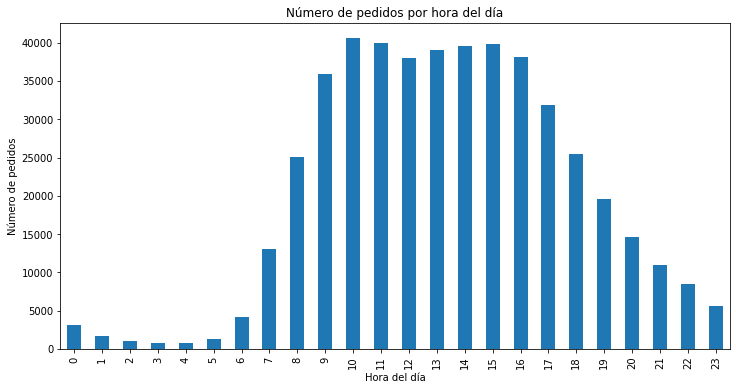

In [42]:
orders_per_hour = instacart_orders['order_hour_of_day'].value_counts().sort_index()
orders_per_hour.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por hora del día')
plt.show()

Escribe aquí tus conclusiones

En base a los resultados se puede observar que el pico máximo de pedidos por hora del día oscila entre las 10 y 16 horas llegando a alcanzar cifras de pedidos de 35000 a 40000.

### [A3] ¿Qué día de la semana compran víveres las personas?

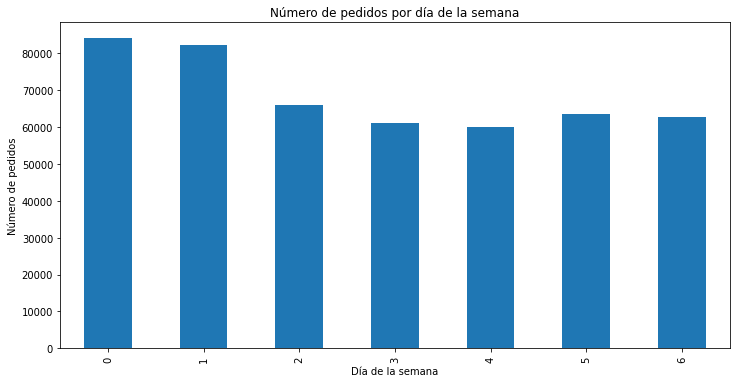

In [43]:
orders_per_dow = instacart_orders['order_dow'].value_counts().sort_index()

orders_per_dow.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por día de la semana')
plt.show()



Escribe aquí tus conclusiones

En base a la tabla se entiende que las personas compran más víveres os días domingo y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

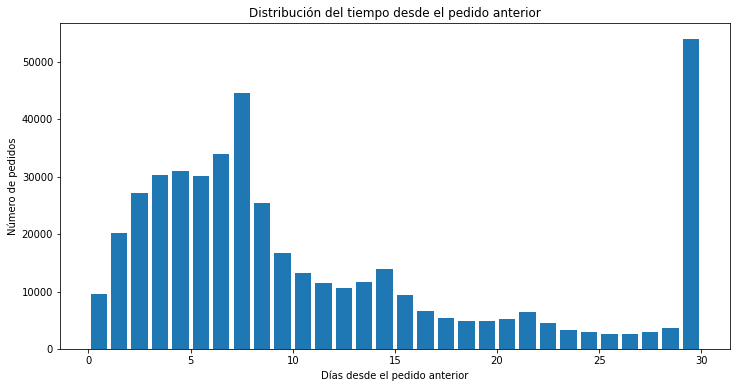

El tiempo mínimo que la gente espera hasta hacer su siguiente pedido es 0.0 días.
El tiempo máximo que la gente espera hasta hacer su siguiente pedido es 30.0 días.


In [44]:
instacart_orders['days_since_prior_order'].plot(kind='hist', rwidth=0.8, bins=30, figsize=(12, 6))
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.title('Distribución del tiempo desde el pedido anterior')
plt.show()

min_days = instacart_orders['days_since_prior_order'].min()
max_days = instacart_orders['days_since_prior_order'].max()
print(f"El tiempo mínimo que la gente espera hasta hacer su siguiente pedido es {min_days} días.")
print(f"El tiempo máximo que la gente espera hasta hacer su siguiente pedido es {max_days} días.")

Escribe aquí tus conclusiones

Se puede observar que las personas por lo general tardan menos de nueve días para hacer su siguiente compra y de ahí es muy bajo el porcentaje hasta llegar al día 30 que contrasta bastante al ser el día en que más personas hacen su siguiente pedido.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [45]:
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 2]['order_hour_of_day']


In [46]:
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 5]['order_hour_of_day']

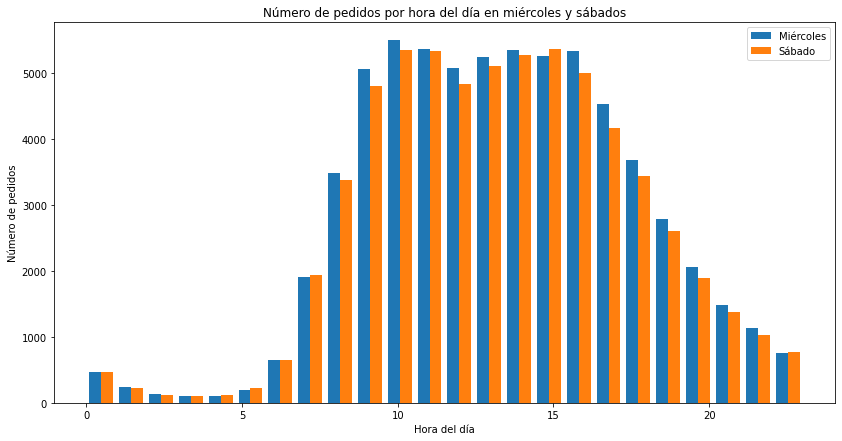

In [47]:
plt.figure(figsize=(14, 7))
plt.hist([wednesday_orders, saturday_orders], bins=24, label=['Miércoles', 'Sábado'])
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por hora del día en miércoles y sábados')
plt.legend(loc='upper right')
plt.show()

Escribe aquí tus conclusiones

Existe una ligera diferencia de número de pedidos entre los días miércoles y sábado, pero se puede percibir que en la mayoría de las horas los dias miércoles hay un ligero incremento de pedidos en comparación con los sábados.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [48]:
orders_per_customer = instacart_orders['user_id'].value_counts()

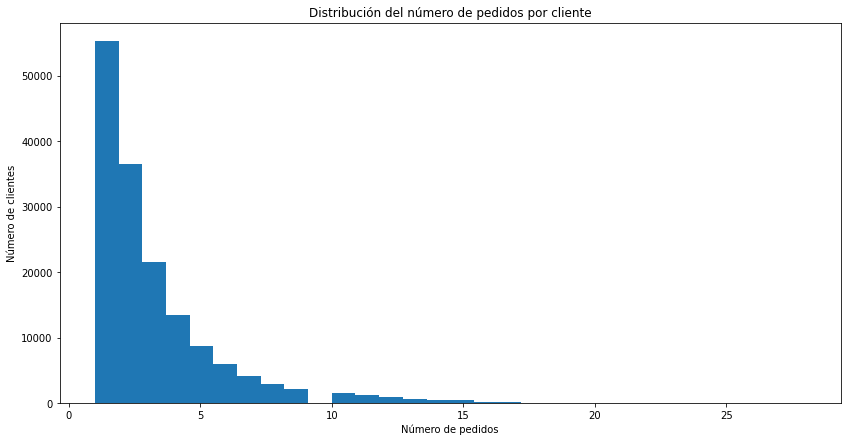

In [49]:
plt.figure(figsize=(14, 7))
plt.hist(orders_per_customer, bins=30)
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de pedidos por cliente')
plt.show()

Escribe aquí tus conclusiones

la mayoría de los clientes hacen un sólo pedido y de ahí se mantiene el rango entre los 10000 y 40000 clientes que realizan hasta 4 pedidos, de ahí en adelante es muy poca la gente la que realiza mas de 5 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [50]:
top_products = order_products['product_id'].value_counts().head(20).index

In [51]:
top_products_names = products[products['product_id'].isin(top_products)]['product_name']

In [52]:
print('Los 20 productos más populares son:')
print(top_products_names)

Los 20 productos más populares son:
5875                Organic Lemon
8276     Apple Honeycrisp Organic
13175      Bag of Organic Bananas
16796                Strawberries
21136        Organic Strawberries
21902        Organic Baby Spinach
22934        Organic Yellow Onion
24851                      Banana
24963              Organic Garlic
26208                       Limes
27844          Organic Whole Milk
27965         Organic Raspberries
28203          Organic Fuji Apple
39274         Organic Blueberries
40705      Organic Grape Tomatoes
45006            Organic Zucchini
47208        Organic Hass Avocado
47625                 Large Lemon
47765             Organic Avocado
49682              Cucumber Kirby
Name: product_name, dtype: object


Escribe aquí tus conclusiones

En base a este ejercicio se puede determinar cuales son los 20 prodcutos más populares.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [53]:
order_sizes = order_products.groupby('order_id').size()

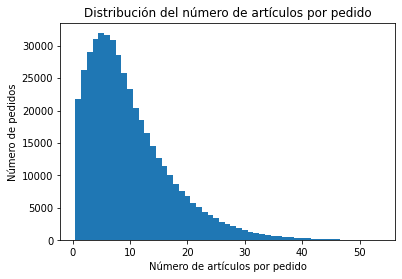

In [54]:
plt.hist(order_sizes, bins=np.arange(1, 55) - 0.5)
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Número de pedidos')
plt.title('Distribución del número de artículos por pedido')
plt.show()

Escribe aquí tus conclusiones

La mayoría de la gente compra entre 2 y 9 artículos en un mismo pedido, de ahí empieza a disminuir proporcionalmente el número de personas que compra más de 9 artículos en un mismo pedido.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
top_reordered_products = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20).index

In [56]:
top_reordered_products_names = products[products['product_id'].isin(top_reordered_products)][['product_id', 'product_name']]

In [57]:
print(top_reordered_products_names)

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49234       49235       Organic Half & Half
49682       49683            Cucumber Kirby


Escribe aquí tus conclusiones

Aquí se muestran los 20 productos que se vuven a pedir con mayor frecuencia.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [58]:
product_order_counts = order_products['product_id'].value_counts()

In [59]:
product_reorder_counts = order_products[order_products['reordered'] == 1]['product_id'].value_counts()

In [60]:
product_reorder_ratio = (product_reorder_counts / product_order_counts).dropna()
print(product_reorder_ratio)

1        0.564286
3        0.738095
4        0.510204
7        0.500000
8        0.315789
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: product_id, Length: 36228, dtype: float64


Escribe aquí tus conclusiones

Aquí se pueden analizar los resultados de las proporciones en que se vuekve a pedir cada producto y lo que se pide con mayor frecuencia se muestra en el ejercicio anterior.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [61]:
customer_order_counts = order_products.groupby('order_id')['product_id'].nunique()

In [62]:
customer_reorder_counts = order_products[order_products['reordered'] == 1].groupby('order_id')['product_id'].nunique()
customer_reorder_ratio = (customer_reorder_counts / customer_order_counts).dropna()
print(customer_reorder_ratio)

order_id
4          0.923077
9          0.666667
11         1.000000
19         1.000000
31         0.900000
             ...   
3421013    0.750000
3421018    0.722222
3421034    1.000000
3421053    1.000000
3421071    0.200000
Name: product_id, Length: 395819, dtype: float64


Escribe aquí tus conclusiones

en el ejercicio anterior se puede observar la proporción de los prodcutos que cada cliente volvió a comprar.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [63]:
first_added_products = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20).index

In [64]:
first_added_products_names = products[products['product_id'].isin(first_added_products)][['product_id', 'product_name']]

In [65]:
print(first_added_products_names)

       product_id                 product_name
195           196                         Soda
5784         5785  Organic Reduced Fat 2% Milk
12340       12341                Hass Avocados
13175       13176       Bag of Organic Bananas
16796       16797                 Strawberries
19659       19660                 Spring Water
21136       21137         Organic Strawberries
21902       21903         Organic Baby Spinach
22934       22935         Organic Yellow Onion
24851       24852                       Banana
26208       26209                        Limes
27085       27086                  Half & Half
27844       27845           Organic Whole Milk
27965       27966          Organic Raspberries
38688       38689     Organic Reduced Fat Milk
44631       44632   Sparkling Water Grapefruit
47208       47209         Organic Hass Avocado
47625       47626                  Large Lemon
47765       47766              Organic Avocado
49234       49235          Organic Half & Half


Escribe aquí tus conclusiones

Aquí se muestran los 20 principales produtos que las personas ponen primero en el carrito.

### Conclusion general del proyecto:

Mediante este proyecto pudimos dar solución a los problemas presentados en cada dataframe y después pudimos profundizar 
en todo el contenido para poder  mostrar una visión general y dar respuestas a preguntas específicas acerca del conjunto
de datos que nos fue proporcionado, logrando ver por ejemplo: las diferencias del volumen de compras de diferentes días 
a la semana, los días en que las personas compran más insumos, los productos que más compra la gente, la proporción de veces
que un artículo se vulve a pedir, los artículos que más vuelve a pedir cada cliente, etc.
